In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')


Mounted at /content/gdrive


In [ ]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.feature_selection import RFECV
from sklearn.ensemble import RandomForestClassifier

Read datasets 

In [ ]:
training = pd.read_csv('/content/gdrive/MyDrive/TAI/training_set.csv')
testing = pd.read_csv('/content/gdrive/MyDrive/TAI/testing_set.csv')

In [ ]:
training.head(5)

,Patient ID,original_shape_Elongation,original_firstorder_Kurtosis,original_firstorder_Skewness,wavelet-LHL_glrlm_RunVariance,wavelet2-LHL_gldm_LargeDependenceEmphasis,wavelet2-LLH_gldm_LargeDependenceEmphasis,wavelet-LHL_gldm_LargeDependenceEmphasis,wavelet2-LHL_gldm_DependenceVariance,wavelet2-LHL_glrlm_RunVariance,...,wavelet-LLL_glszm_LargeAreaLowGrayLevelEmphasis,wavelet2-HHH_firstorder_RootMeanSquared,wavelet2-LLH_firstorder_Kurtosis,wavelet-HHL_glcm_Imc2,wavelet2-LHH_firstorder_RobustMeanAbsoluteDeviation,original_shape_SphericalDisproportion,wavelet2-HHL_glcm_Idmn,wavelet2-LHH_firstorder_RootMeanSquared,wavelet2-HLL_firstorder_Maximum,Label
0,34,0.746498,1.627599,0.308239,0.159175,15.166667,7.000000,18.333333,4.055556,0.141877,...,9.675926,0.515705,1.715728,0.284389,0.315403,1.000196,0.923905,0.916628,47.539975,0
1,76,0.629092,2.051976,0.397052,11.477560,4194.479987,1644.024016,4341.984323,635.549639,11.357956,...,3.241028,0.075102,2.400250,0.005110,0.260886,1.329506,0.896269,0.461445,10.575639,1
2,34,0.784976,2.777778,0.993808,0.276259,12.800000,5.800000,15.800000,2.560000,0.230895,...,20.000000,0.366232,3.422232,0.559031,0.251377,0.996453,0.928254,0.785968,25.730701,0
3,46,0.577087,2.603525,0.710759,6.556231,2896.170217,2142.948016,3388.937854,485.392841,5.569620,...,220.845578,0.146085,3.380679,0.036039,0.370779,1.402542,0.895293,0.667424,21.795029,0
4,75,0.830552,2.354637,0.522244,1.535882,738.784091,250.613636,1363.761364,186.534091,0.982014,...,17.550530,0.240182,2.272586,0.028931,0.472858,1.114944,0.910136,0.779987,28.225306,1


Split datasets as x and Y

In [ ]:
train_id = training.iloc[:, 0]
X_train = training.iloc[:, 1:-1]
y_train = training.iloc[:, -1]

test_id = testing.iloc[:, 0]
X_test = testing.iloc[:, 1:-1]
y_test = testing.iloc[:, -1]


Feature selection model training

Number of selected features:  38


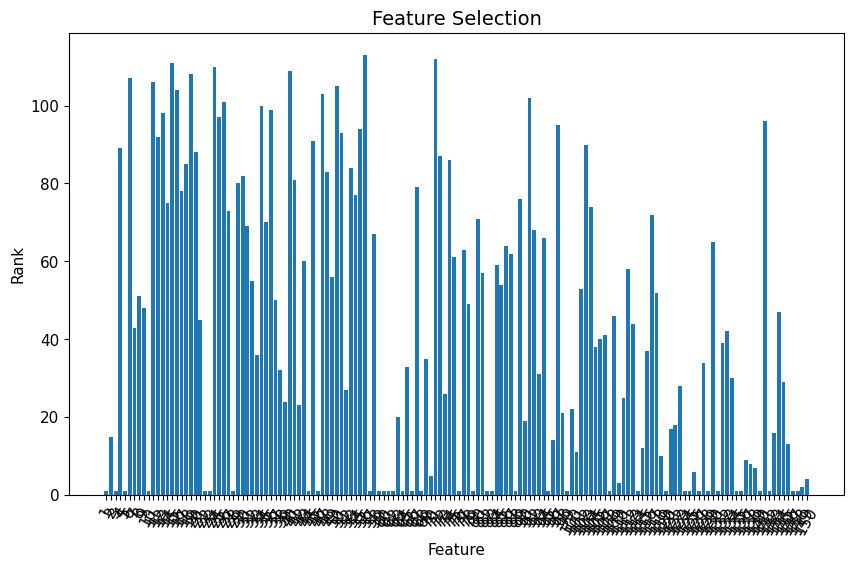

<Figure size 640x480 with 0 Axes>

In [ ]:
np.random.seed(42)
estimator = RandomForestClassifier()
selector = RFECV(estimator)

selector = selector.fit(X_train, y_train)
print("Number of selected features: ", selector.n_features_)
# get all feature names
feature_names = X_train.columns.tolist()
# get the indices of selected features
selected_indices = selector.get_support(indices=True)
# get the selected feature names
selected_feature_names = [feature_names[i] for i in selected_indices]

predictors = []
for i in range(1, X_train.shape[1]+1):
    predictors.append(str(i))
# get feature ranks
ranks = selector.ranking_
selector.get_support(True)

plt.figure(figsize=(10, 6))
plt.bar(range(len(predictors)), ranks)
plt.xticks(range(len(predictors)), predictors, fontsize = 11, rotation = 60)
plt.yticks(fontsize = 11)
plt.xlabel('Feature', fontsize = 11)
plt.ylabel('Rank', fontsize = 11)
plt.title('Feature Selection', fontsize = 14)
plt.show()
plt.savefig("/content/gdrive/MyDrive/TAI/feature_selection.jpg")
# Transform the datasets to reduced ones
reduced_X_train = pd.DataFrame(selector.transform(X_train), columns=selected_feature_names)
reduced_X_test = pd.DataFrame(selector.transform(X_test), columns=selected_feature_names)


In [ ]:
# add patient id to datasets
reduced_X_train.insert(0, 'Patient ID', train_id)
reduced_X_test.insert(0, 'Patient ID', test_id)


In [ ]:
# add labels
reduced_X_train['Label'] = y_train.tolist()
reduced_X_test['Label'] = y_test.tolist()

In [ ]:
reduced_X_train.shape

(2434, 40)

In [ ]:
reduced_X_test.shape

(1128, 40)

In [ ]:
reduced_X_train.head(5)

,Patient ID,original_shape_Elongation,original_firstorder_Skewness,wavelet2-LHL_gldm_LargeDependenceEmphasis,wavelet-LHL_glrlm_LongRunEmphasis,wavelet-LHL_glrlm_RunPercentage,wavelet-HHH_glrlm_RunLengthNonUniformityNormalized,wavelet-LHH_glrlm_ShortRunEmphasis,wavelet-LHL_glrlm_RunLengthNonUniformityNormalized,log-sigma-3-0-mm-3D_gldm_LargeDependenceLowGrayLevelEmphasis,...,wavelet2-LLL_glcm_Contrast,wavelet2-LHH_glrlm_ShortRunLowGrayLevelEmphasis,wavelet-HHH_firstorder_90Percentile,log-sigma-3-0-mm-3D_gldm_SmallDependenceHighGrayLevelEmphasis,original_firstorder_Kurtosis.1,wavelet2-HLL_firstorder_RootMeanSquared,wavelet-LLL_glszm_LargeAreaLowGrayLevelEmphasis,original_shape_SphericalDisproportion,wavelet2-HHL_glcm_Idmn,Label
0,34,0.746498,0.308239,15.166667,1.483094,1.231011,0.779418,0.905023,0.762728,30.000000,...,21.472746,0.464768,0.971789,0.199476,1.627599,38.364922,9.675926,1.000196,0.923905,0
1,76,0.629092,0.397052,4194.479987,23.678905,0.405498,0.389592,0.634210,0.204996,703.296082,...,214.424383,0.347917,0.380856,0.008536,2.051976,3.412361,3.241028,1.329506,0.896269,1
2,34,0.784976,0.993808,12.800000,1.911518,1.107642,0.822129,0.934434,0.616016,15.800000,...,6.343563,0.306492,0.909483,0.128263,2.777778,16.701131,20.000000,0.996453,0.928254,0
3,46,0.577087,0.710759,2896.170217,15.066560,0.485534,0.396913,0.639746,0.223692,1765.250000,...,70.835116,0.358830,0.466787,0.001531,2.603525,7.192055,220.845578,1.402542,0.895293,0
4,75,0.830552,0.522244,738.784091,6.039749,0.667421,0.484016,0.689224,0.284998,2168.602273,...,52.121725,0.359239,1.302800,0.000626,2.354637,16.746710,17.550530,1.114944,0.910136,1


In [ ]:
reduced_X_test.head(5)

,Patient ID,original_shape_Elongation,original_firstorder_Skewness,wavelet2-LHL_gldm_LargeDependenceEmphasis,wavelet-LHL_glrlm_LongRunEmphasis,wavelet-LHL_glrlm_RunPercentage,wavelet-HHH_glrlm_RunLengthNonUniformityNormalized,wavelet-LHH_glrlm_ShortRunEmphasis,wavelet-LHL_glrlm_RunLengthNonUniformityNormalized,log-sigma-3-0-mm-3D_gldm_LargeDependenceLowGrayLevelEmphasis,...,wavelet2-LLL_glcm_Contrast,wavelet2-LHH_glrlm_ShortRunLowGrayLevelEmphasis,wavelet-HHH_firstorder_90Percentile,log-sigma-3-0-mm-3D_gldm_SmallDependenceHighGrayLevelEmphasis,original_firstorder_Kurtosis.1,wavelet2-HLL_firstorder_RootMeanSquared,wavelet-LLL_glszm_LargeAreaLowGrayLevelEmphasis,original_shape_SphericalDisproportion,wavelet2-HHL_glcm_Idmn,Label
0,42,0.348600,0.786427,2062.303210,13.252299,0.498778,0.420325,0.659345,0.219646,2964.800238,...,62.686571,0.371176,0.512931,0.012509,2.951188,7.469105,126.468425,1.435609,0.892774,0
1,69,0.520017,0.683662,280.163227,4.257438,0.821070,0.401405,0.550825,0.399486,1279.592871,...,43.781697,0.273735,0.747168,0.011861,2.308772,68.406658,13.966745,1.632029,0.969084,1
2,37,0.742012,0.445384,51.105263,2.867227,0.903385,0.649728,0.858228,0.450085,46.078947,...,9.298749,0.454472,0.915131,0.450587,2.218344,82.666960,7.876736,0.996548,1.000000,0
3,42,0.397422,0.912152,812.318708,6.567451,0.693505,0.402897,0.654554,0.348718,1691.498781,...,13.865071,0.368862,1.098508,0.008294,3.415089,62.312843,457.776639,1.455127,0.958663,0
4,24,0.650720,0.531621,2010.663748,17.950744,0.454577,0.343794,0.623606,0.235585,2706.204010,...,140.002022,0.379908,1.094894,0.006382,2.354761,56.375511,6.796109,1.291926,0.978299,0


Save reduced datasets to files

In [ ]:
reduced_X_train.to_csv("/content/gdrive/MyDrive/TAI/reduced_training_set.csv", index=False)
reduced_X_test.to_csv("/content/gdrive/MyDrive/TAI/reduced_testing_set.csv", index=False)